# Universidad de Buenos Aires
# Deep Learning - Examen

Descargar el dataset del siguiente link: https://drive.google.com/file/d/1X8_G5BpQMi-Nnbtms2RL8lcWSxzD8ixd/view?usp=sharing

El dataset son compras de productos que diferentes clientes realizaron durante el black sales.

El dataset contiene información sobre las transacciones y el objetivo es poder utilizar el dataset para crear diferentes modelos que puedan predecir cuanto un cliente está dispuesto a gastar en un producto en el futuro. Particularmente, vamos a tratar este problema como una clasificación binaria donde queremos averiguar si el cliente va a gatar mucha plata (más de 9000) o poca plata (menos de 9000).

Vamos a construir 4 modelos:

* Un modeo que siempre predice que los clientes gastan mucha plata en todos los productos.
* Un modelo del tipo de Regresión Logīstica. 
* Un modelo del tipo Random Forest.
* Un modelo del tipo Deep Learning sin embeddings.
* Un modelo del tipo Deep Learning con embeddings.

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model

df_train = pd.read_csv('/content/sample_data/black_sales.csv')

# Análisis de datos

1. Imprimir las 5 primeros filas del dataset. 
2. Imprimir los tipos de cada columna del dataset.
3. Imprimir las estadísticas básicas de cada columnas. 
4. Hacer un histograma de la variable Purchase.
5. Que columnas son categóricas y cuales son numéricas?
6. Para las columnas categóricas, cuántas clases únicas tienen cada una?

## 1 - Imprimir las 5 primeros filas del dataset. 


In [4]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## 2 - Imprimir los tipos de cada columna del dataset.


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


## 3 - Imprimir las estadísticas básicas de cada columnas. 


In [6]:
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


## 4 - Hacer un histograma de la variable Purchase.

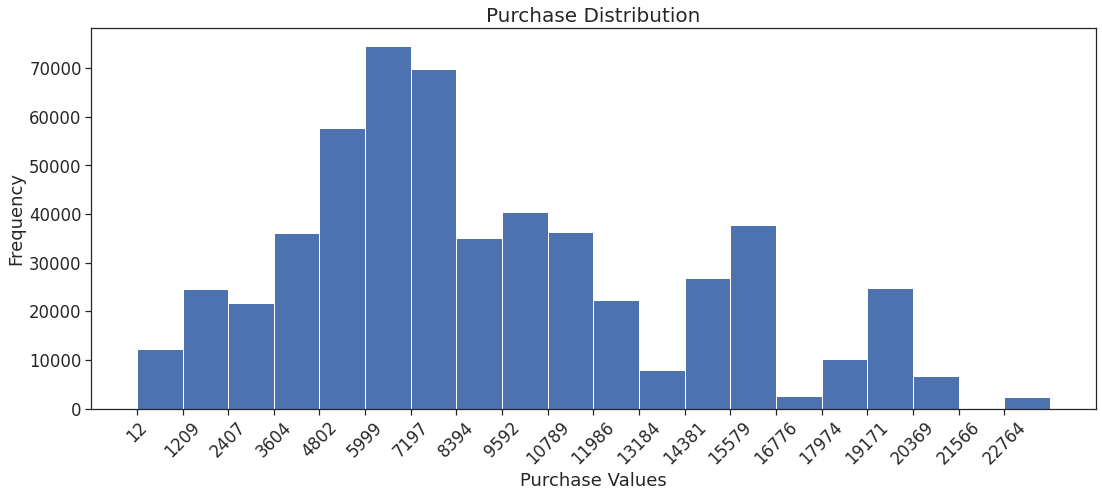

In [7]:
xticks = np.arange(df_train.Purchase.min(), 
                   df_train.Purchase.max(), 
                   (df_train.Purchase.max()-df_train.Purchase.min())/20)

df_train['Purchase'].plot(
    kind='hist',
    bins=20,
    figsize=(18,7),
    xticks= xticks)

plt.title('Purchase Distribution', size=20)
plt.xticks(rotation=45)
plt.xlabel('Purchase Values')
plt.show()

## 5 - Que columnas son categóricas y cuales son numéricas?

> Las variables numericas son __Purchase__ y __Age__ mientras que las demas features son categoricas.

In [8]:
df_train['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

## 6 - Para las columnas categóricas, cuántas clases únicas tienen cada una?

In [9]:
df_train.nunique()


User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

# Limpieza de datos

1. Que columnas tienen NaNs?
2. Si la cantidad de filas afectas por NaNs es grande, se propone reemplazar los NaNs por una nueva clase, por ejemplo el valor 999. 


## 1 - Que columnas tienen NaNs?


In [10]:
df_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

## 2 - Si la cantidad de filas afectas por NaNs es grande, se propone reemplazar los NaNs por una nueva clase, por ejemplo el valor 999. 

In [11]:
df_train['Product_Category_2'].fillna(999, inplace=True)
df_train['Product_Category_3'].fillna(999, inplace=True)


df_train['Product_Category_1'].fillna(df_train['Product_Category_1'].median(), inplace=True)
df_train['Marital_Status'].fillna(df_train['Marital_Status'].median(), inplace=True)
df_train['Purchase'].fillna(df_train['Purchase'].median(), inplace=True)

# Ingeniería de features

1. Transformar todas las variables categoricas (expecto User_Id y Prdoct_Id) en one-hot-encoding. 
2. Crear un index para User_Id y Product_id, para poder entrenar un modelo de Deep Learning con embeddings.
3. Porque es importante crear un index para entrenar el modelo de Deep Learning con embeddings?
4. Porque es importante guardar el mapping de id a index?
5. Transformar la variable Purchase en una variable purchase_binary, tal que todos los valores mayores a 9000 hagan un mapping a 1 y todos los valores menores o iguales a 9000 hagan un mapping a 0.
6. Normalizar todos los valores entre 0 y 1.
7. Hacer un split del dataset en training (70%), validation (20%) y testing (10%). Para crear el dataset de training se recomienda separar User_id y Product_id de la matriz x_train, x_valid y x_test. Pero también obtener user_idx_train, user_idx_valid y user_idex_test de tal manera que sea correspondientes con las matrices x. Lo mismo para el Product_Id. 

## 1 - Transformar todas las variables categoricas (expecto User_Id y Prdoct_Id) en one-hot-encoding. 


In [12]:
df_train.shape

(550068, 12)

In [13]:
gen_one_hot = pd.get_dummies(df_train[df_train.columns[2]], prefix='gen')
age_one_hot = pd.get_dummies(df_train[df_train.columns[3]], prefix='age')
ocu_one_hot = pd.get_dummies(df_train[df_train.columns[4]], prefix='ocu')
city_one_hot = pd.get_dummies(df_train[df_train.columns[5]], prefix='city')
stay_one_hot = pd.get_dummies(df_train[df_train.columns[6]], prefix='stay')
marital_one_hot = pd.get_dummies(df_train[df_train.columns[7]], prefix='marital')
pc1_one_hot = pd.get_dummies(df_train[df_train.columns[8]], prefix='pc1')
pc2_one_hot = pd.get_dummies(df_train[df_train.columns[9]], prefix='pc2')
pc3_one_hot = pd.get_dummies(df_train[df_train.columns[10]], prefix='pc3')

df_train_one_hot = pd.concat([df_train['User_ID'], 
                              df_train['Product_ID'],
                              gen_one_hot, 
                              age_one_hot, 
                              ocu_one_hot, 
                              city_one_hot,
                              stay_one_hot, 
                              marital_one_hot,
                              pc1_one_hot,
                              pc2_one_hot,
                              pc3_one_hot,
                              df_train['Purchase']], axis=1)                    

## 2 - Crear un index para User_Id y Product_id, para poder entrenar un modelo de Deep Learning con embeddings.

In [14]:
n_users = len(df_train.User_ID.unique())
id_users = df_train.User_ID.unique()
indexes_users = np.arange(0, n_users)

n_prods = len(df_train.Product_ID.unique())
id_prods = df_train.Product_ID.unique()
indexes_prods = np.arange(0, n_prods)

de_id2idx_users = {id : idx for id, idx in zip(id_users, indexes_users)}
de_idx2id_users = {idx : id for idx, id in zip(indexes_users, id_users)}

de_id2idx_prods = {idx : id for idx, id in zip(id_prods, indexes_prods)}
de_idx2id_prods = {idx : id for idx, id in zip(indexes_prods, id_prods)}


df_train_one_hot['User_ID'] = df_train_one_hot['User_ID'].map(de_id2idx_users)
df_train_one_hot['Product_ID'] = df_train_one_hot['Product_ID'].map(de_id2idx_prods)

## 3 - Porque es importante crear un index para entrenar el modelo de Deep Learning con embeddings?

> Es importante crear un index porque puede que contenga informacion de contexto que no sea facil de ver para nosotros, aunque un emmbeding podemos aprender esa relacion y para esto necesitamos que sean numeros.


## 4 - Porque es importante guardar el mapping de id a index?

> Es importante guardar el mapping para que cuando realizemos las predicciones podamos linkear devuelta a las predicciones con sus respectivos Usuarios, Productos, etc

## 5 - Transformar la variable Purchase en una variable purchase_binary, tal que todos los valores mayores a 9000 hagan un mapping a 1 y todos los valores menores o iguales a 9000 hagan un mapping a 0.

In [15]:
df_train_one_hot['Purchase_binary'] = df_train_one_hot['Purchase'].values


df_train_one_hot['Purchase_binary'][df_train_one_hot['Purchase']<9000] = 0
df_train_one_hot['Purchase_binary'][df_train_one_hot['Purchase']>9000] = 1

df_train_one_hot['Purchase_binary'].value_counts()

df_train_one_hot.drop('Purchase', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## 6 - Normalizar todos los valores entre 0 y 1.


In [16]:
df_train_one_hot.columns

Index(['User_ID', 'Product_ID', 'gen_F', 'gen_M', 'age_0-17', 'age_18-25',
       'age_26-35', 'age_36-45', 'age_46-50', 'age_51-55', 'age_55+', 'ocu_0',
       'ocu_1', 'ocu_2', 'ocu_3', 'ocu_4', 'ocu_5', 'ocu_6', 'ocu_7', 'ocu_8',
       'ocu_9', 'ocu_10', 'ocu_11', 'ocu_12', 'ocu_13', 'ocu_14', 'ocu_15',
       'ocu_16', 'ocu_17', 'ocu_18', 'ocu_19', 'ocu_20', 'city_A', 'city_B',
       'city_C', 'stay_0', 'stay_1', 'stay_2', 'stay_3', 'stay_4+',
       'marital_0', 'marital_1', 'pc1_1', 'pc1_2', 'pc1_3', 'pc1_4', 'pc1_5',
       'pc1_6', 'pc1_7', 'pc1_8', 'pc1_9', 'pc1_10', 'pc1_11', 'pc1_12',
       'pc1_13', 'pc1_14', 'pc1_15', 'pc1_16', 'pc1_17', 'pc1_18', 'pc1_19',
       'pc1_20', 'pc2_2.0', 'pc2_3.0', 'pc2_4.0', 'pc2_5.0', 'pc2_6.0',
       'pc2_7.0', 'pc2_8.0', 'pc2_9.0', 'pc2_10.0', 'pc2_11.0', 'pc2_12.0',
       'pc2_13.0', 'pc2_14.0', 'pc2_15.0', 'pc2_16.0', 'pc2_17.0', 'pc2_18.0',
       'pc2_999.0', 'pc3_3.0', 'pc3_4.0', 'pc3_5.0', 'pc3_6.0', 'pc3_8.0',
       'pc3_9.0'

In [17]:
df_train_one_hot = df_train_one_hot.astype(float)

In [18]:
df_train_one_hot.shape

(550068, 97)

In [19]:
df_train_one_hot.iloc[:,:2].head()

,User_ID,Product_ID
0,0.0,0.0
1,0.0,1.0
2,0.0,2.0
3,0.0,3.0
4,1.0,4.0


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_train_one_hot.iloc[:,:2])
df_train_one_hot.iloc[:,:2] = scaler.transform(df_train_one_hot.iloc[:,:2])


In [21]:
df_train_one_hot.iloc[:,:2].max().head()

User_ID       1.0
Product_ID    1.0
dtype: float64

In [22]:
df_train_one_hot.shape

(550068, 97)

## 7 - Hacer un split del dataset en training (70%), validation (20%) y testing (10%). Para crear el dataset de training se recomienda separar User_id y Product_id de la matriz x_train, x_valid y x_test. Pero también obtener user_idx_train, user_idx_valid y user_idex_test de tal manera que sea correspondientes con las matrices x. Lo mismo para el Product_Id. 

In [23]:
from sklearn.model_selection import train_test_split

trainX, testX, trainy, testy = train_test_split(df_train_one_hot.iloc[:,:-1], df_train_one_hot.iloc[:,-1], test_size=0.3)

user_idx_train = trainX.iloc[:50000,0]
user_idx_test = testX.iloc[:5000,0]


prod_idx_train = trainX.iloc[:50000,1]
prod_idx_test = testX.iloc[:5000,1]


x_train = trainX.iloc[:50000,2:]
x_test = testX.iloc[:5000,2:]


y_train = trainy.iloc[0:50000]
y_test = testy.iloc[0:5000]


In [60]:
x_train.columns

Index(['gen_F', 'gen_M', 'age_0-17', 'age_18-25', 'age_26-35', 'age_36-45',
       'age_46-50', 'age_51-55', 'age_55+', 'ocu_0', 'ocu_1', 'ocu_2', 'ocu_3',
       'ocu_4', 'ocu_5', 'ocu_6', 'ocu_7', 'ocu_8', 'ocu_9', 'ocu_10',
       'ocu_11', 'ocu_12', 'ocu_13', 'ocu_14', 'ocu_15', 'ocu_16', 'ocu_17',
       'ocu_18', 'ocu_19', 'ocu_20', 'city_A', 'city_B', 'city_C', 'stay_0',
       'stay_1', 'stay_2', 'stay_3', 'stay_4+', 'marital_0', 'marital_1',
       'pc1_1', 'pc1_2', 'pc1_3', 'pc1_4', 'pc1_5', 'pc1_6', 'pc1_7', 'pc1_8',
       'pc1_9', 'pc1_10', 'pc1_11', 'pc1_12', 'pc1_13', 'pc1_14', 'pc1_15',
       'pc1_16', 'pc1_17', 'pc1_18', 'pc1_19', 'pc1_20', 'pc2_2.0', 'pc2_3.0',
       'pc2_4.0', 'pc2_5.0', 'pc2_6.0', 'pc2_7.0', 'pc2_8.0', 'pc2_9.0',
       'pc2_10.0', 'pc2_11.0', 'pc2_12.0', 'pc2_13.0', 'pc2_14.0', 'pc2_15.0',
       'pc2_16.0', 'pc2_17.0', 'pc2_18.0', 'pc2_999.0', 'pc3_3.0', 'pc3_4.0',
       'pc3_5.0', 'pc3_6.0', 'pc3_8.0', 'pc3_9.0', 'pc3_10.0', 'pc3_11.0',
      

#Modelo base

1. Entrenar un modelo base que siempre de como predicción que el purchase del cliente es de valor elevado.
2. Calcular el AUC de este modelo.
3. Porque es importante siempre definir un modelo base?

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc

from sklearn.metrics import classification_report

In [26]:

#Prediccion sin criterio alguno
ns_pred = [0 for _ in range(len(y_test))]
fpr_ns, tpr_ns, threshold = roc_curve(y_test, ns_pred)
roc_auc_ns = auc(fpr_ns, tpr_ns)

print('Sin Criterio AUC = %0.2f' % roc_auc_ns)

Sin Criterio AUC = 0.50


## 3 - Porque es importante siempre definir un modelo base?

> Para ver las metricas del modelo mas simple que se puede crear y a partir de ahi ir aumentando la complegidad de los modelos para ver si logramos superarlas.

In [27]:
def get_mets(x):
    metrics = []
    report = x.split(' ')
    for i in range(len(report)-1):
        if len(report[i]) > 3:
            metrics.append(report[i])
    return metrics

# Regresión logísica

1. Entrenar un modelo de regresión logística que sea mejor que el modelo base (no usar User_Id y Product_Id). 
2. Porque es importante normalizar los datos antes de entrenar el modelo de regresión logística?
3. Porque es importante utilizar una metrica como AUC en un problema de clasificación binaria?

In [28]:
from sklearn.linear_model import LogisticRegression



lr = LogisticRegression(solver='sag', max_iter=500)
lr.fit(x_train.values,y_train.values)

lr_y_pred = lr.predict(x_test.values)

class_rep_lr = classification_report(y_test.values, lr_y_pred)

print(class_rep_lr)

              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89      2962
         1.0       0.82      0.87      0.84      2038

    accuracy                           0.87      5000
   macro avg       0.86      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



In [29]:
lr_metrics = get_mets(class_rep_lr)

lr_precision = lr_metrics[8]
lr_recall = lr_metrics[9]
lr_f1 = round(f1_score(y_test, lr_y_pred),2)
lr_acc = round(accuracy_score(y_test, lr_y_pred),2)

#test data ROC
fpr_ts_lr, tpr_ts_lr, threshold_lr = roc_curve(y_test, lr_y_pred)
roc_auc_test_lr = round(auc(fpr_ts_lr, tpr_ts_lr), 2)

print('La precision del modelo es {}'.format(lr_precision,))
print('El recall del modelo es {}'.format(lr_recall))
print('El F1 score del modelo es {}'.format(lr_f1))
print('El acierto del modelo es {}'.format(lr_acc))
print('El AUC en los datos de Test {}'.format(roc_auc_test_lr))

La precision del modelo es 0.82
El recall del modelo es 0.87
El F1 score del modelo es 0.84
El acierto del modelo es 0.87
El AUC en los datos de Test 0.87


## 2 - Porque es importante normalizar los datos antes de entrenar el modelo de regresión logística?

> La regresion Logistica como su nombre lo indica se entrena utilizando una regresion y cuando los datos no estan normalizados esta tendera a darle mas o menos peso a esas variables dependiendo de como esten, aprendiendo otras relaciones que no son las optimas.

## 3 - Porque es importante utilizar una metrica como AUC en un problema de clasificación binaria?

> La metrica de AUC es importante en la clasificacion porque esta no depende del punto de corte elgido sino que esta ligada al modelo en si.

# Random forest

1. Entrenar un modelo de Random Forest que sea mejor que el modelo base (no usar User_Id y Product_Id).

In [30]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(x_train.values,y_train.values)

forest_y_pred = forest.predict(x_test)

class_rep_forest = classification_report(y_test, forest_y_pred)
print(class_rep_forest)

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      2962
         1.0       0.80      0.83      0.82      2038

    accuracy                           0.85      5000
   macro avg       0.84      0.85      0.84      5000
weighted avg       0.85      0.85      0.85      5000



In [31]:
forest_metrics = get_mets(class_rep_forest)

forest_precision = forest_metrics[8]
forest_recall = forest_metrics[9]
forest_f1 = round(f1_score(y_test, forest_y_pred),2)
forest_acc = round(accuracy_score(y_test, forest_y_pred),2)

#test data ROC
fpr_ts_forest, tpr_ts_forest, threshold_forest = roc_curve(y_test, forest_y_pred)
roc_auc_test_forest = round(auc(fpr_ts_forest, tpr_ts_forest),2)

print('La precision del modelo es {}'.format(forest_precision,))
print('El recall del modelo es {}'.format(forest_recall))
print('El F1 score del modelo es {}'.format(forest_f1))
print('El acierto del modelo es {}'.format(forest_acc))
print('El AUC en los datos de Test {}'.format(roc_auc_test_forest))

La precision del modelo es 0.80
El recall del modelo es 0.83
El F1 score del modelo es 0.82
El acierto del modelo es 0.85
El AUC en los datos de Test 0.85


# Deep learning sin embeddings

1. Entrenar un modelo de Deep Learning que no utilice embeddings (no usar User_Id y Product_Id).

In [32]:
_, in_dim = x_train.shape

In [33]:
model1 = Sequential()

model1.add(Dense(128, input_dim=in_dim)) 
model1.add(Dense(64, activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))  

model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics='AUC')

In [34]:
history = model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
782/782 [==============================] - 3s 4ms/step - loss: 0.3337 - auc: 0.9195 - val_loss: 0.3246 - val_auc: 0.9262
Epoch 2/10
782/782 [==============================] - 2s 3ms/step - loss: 0.3136 - auc: 0.9278 - val_loss: 0.3153 - val_auc: 0.9268
Epoch 3/10
782/782 [==============================] - 1s 2ms/step - loss: 0.3099 - auc: 0.9300 - val_loss: 0.3178 - val_auc: 0.9267
Epoch 4/10
782/782 [==============================] - 1s 2ms/step - loss: 0.3082 - auc: 0.9310 - val_loss: 0.3161 - val_auc: 0.9276
Epoch 5/10
782/782 [==============================] - 1s 2ms/step - loss: 0.3059 - auc: 0.9326 - val_loss: 0.3149 - val_auc: 0.9276
Epoch 6/10
782/782 [==============================] - 1s 2ms/step - loss: 0.3039 - auc: 0.9339 - val_loss: 0.3144 - val_auc: 0.9281
Epoch 7/10
782/782 [==============================] - 1s 2ms/step - loss: 0.3018 - auc: 0.9350 - val_loss: 0.3148 - val_auc: 0.9288
Epoch 8/10
782/782 [==============================] - 1s 2ms/step - loss: 0.

In [35]:
y_pred_seq = model1.predict_classes(x_test)


clas_rep = classification_report(y_test, y_pred_seq)
print(clas_rep)

seq_class_rep_mets = get_mets(clas_rep)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

         0.0       0.91      0.86      0.88      2962
         1.0       0.81      0.88      0.84      2038

    accuracy                           0.87      5000
   macro avg       0.86      0.87      0.86      5000
weighted avg       0.87      0.87      0.87      5000



In [36]:
seq_precision = seq_class_rep_mets[8]
seq_recall = seq_class_rep_mets[9]
seq_f1 = round(f1_score(y_test, y_pred_seq),2)
seq_acc = round(accuracy_score(y_test, y_pred_seq),2)

#test data ROC
fpr_ts_seq, tpr_ts_seq, threshold_seq = roc_curve(y_test, y_pred_seq)
roc_auc_test_seq = round(auc(fpr_ts_seq, tpr_ts_seq),2)

print('La precision del modelo es {}'.format(seq_precision,))
print('El recall del modelo es {}'.format(seq_recall))
print('El F1 score del modelo es {}'.format(seq_f1))
print('El acierto del modelo es {}'.format(seq_acc))
print('El AUC en los datos de Test {}'.format(roc_auc_test_seq))

La precision del modelo es 0.81
El recall del modelo es 0.88
El F1 score del modelo es 0.84
El acierto del modelo es 0.87
El AUC en los datos de Test 0.87


# Deep learning con embeddings

1. Entrenar un model de Deep Learning que utilice embeddings de los usuarios y los productos.

In [37]:
user_idx_train.max()

1.0

In [38]:
#user_idx_train
#user_idx_test 


#prod_idx_train 
#prod_idx_test 

##################

user_embedding_size = 10
prod_embedding_size = 10

# Each instance will consist of two inputs: a single user id, and a single product id
user_id_input = keras.Input(shape=(1,), name='user_id')

prod_id_input = keras.Input(shape=(1,), name='prod_id')



user_embedded = keras.layers.Embedding(int(user_idx_train.max())+2, user_embedding_size, 
                                       input_length=1, name='user_embedding')(user_id_input)
prod_embedded = keras.layers.Embedding(int(prod_idx_train.max())+2, prod_embedding_size, 
                                        input_length=1, name='prod_embedding')(prod_id_input)


flatten_user_emb = keras.layers.Flatten()(user_embedded)
flatten_prod_emb = keras.layers.Flatten()(prod_embedded)

# Concatenate the embeddings (and remove the useless extra dimension)
feats_input = keras.Input(shape=(in_dim,), name='data_feats')
concatenated = keras.layers.Concatenate()([flatten_user_emb, flatten_prod_emb, feats_input])





# Add one or more hidden layers
hidden = keras.layers.Dense(32, activation='relu')(concatenated)

# A single output: our predicted rating
out = keras.layers.Dense(1, activation='sigmoid', name='prediction')(hidden)

model = keras.Model(
    inputs = [user_id_input, prod_id_input, feats_input],
    outputs = out,
)
model.summary(line_length=88)

Model: "functional_1"
________________________________________________________________________________________
Layer (type)                 Output Shape       Param #   Connected to                  
user_id (InputLayer)         [(None, 1)]        0                                       
________________________________________________________________________________________
prod_id (InputLayer)         [(None, 1)]        0                                       
________________________________________________________________________________________
user_embedding (Embedding)   (None, 1, 10)      30        user_id[0][0]                 
________________________________________________________________________________________
prod_embedding (Embedding)   (None, 1, 10)      20        prod_id[0][0]                 
________________________________________________________________________________________
flatten (Flatten)            (None, 10)         0         user_embedding[0][0]          

In [39]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics='AUC')

In [40]:
history2 = model.fit([user_idx_train,prod_idx_train,x_train], y_train, validation_data=([user_idx_test,prod_idx_test,x_test], y_test), epochs=15, batch_size=1000)

Epoch 1/15
50/50 [==============================] - 1s 15ms/step - loss: 0.6196 - auc: 0.7148 - val_loss: 0.5538 - val_auc: 0.8459
Epoch 2/15
50/50 [==============================] - 0s 6ms/step - loss: 0.4891 - auc: 0.8718 - val_loss: 0.4354 - val_auc: 0.8941
Epoch 3/15
50/50 [==============================] - 0s 6ms/step - loss: 0.4023 - auc: 0.9050 - val_loss: 0.3780 - val_auc: 0.9126
Epoch 4/15
50/50 [==============================] - 0s 6ms/step - loss: 0.3603 - auc: 0.9171 - val_loss: 0.3509 - val_auc: 0.9175
Epoch 5/15
50/50 [==============================] - 0s 6ms/step - loss: 0.3389 - auc: 0.9221 - val_loss: 0.3359 - val_auc: 0.9205
Epoch 6/15
50/50 [==============================] - 0s 6ms/step - loss: 0.3278 - auc: 0.9255 - val_loss: 0.3284 - val_auc: 0.9222
Epoch 7/15
50/50 [==============================] - 0s 6ms/step - loss: 0.3218 - auc: 0.9271 - val_loss: 0.3243 - val_auc: 0.9235
Epoch 8/15
50/50 [==============================] - 0s 6ms/step - loss: 0.3178 - auc: 0.9

In [41]:
y_pred_emb = model.predict([user_idx_test,prod_idx_test,x_test])


#clas_rep = classification_report(y_test, y_pred_emb)
print(y_pred_emb)

#emb_class_rep_mets = get_mets(clas_rep)

[[0.8417833 ]
 [0.8669696 ]
 [0.7651708 ]
 ...
 [0.8011868 ]
 [0.79196286]
 [0.00358203]]


In [42]:
test_scores = model.evaluate([user_idx_test,prod_idx_test,x_test], y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test auc:", test_scores[1])

model.metrics_names

157/157 - 0s - loss: 0.3178 - auc: 0.9245
Test loss: 0.3177875280380249
Test auc: 0.9245358109474182


['loss', 'auc']

# Comparación de los modelos

1. Comparar los resultados obtenidos.
2. Hacer el gráfico de la región de decison para cada modelo.

In [43]:
pd.DataFrame({'Models':['Logistic Regression', 
                        'Random Forest Classifier', 
                        'Sequencial Model', 
                        'Sequencal Model w/ Embbedings'],
             'Accuracy Score': [lr_acc, 
                               forest_acc, 
                               seq_acc, 
                               np.nan], 
             'F1 Score':[lr_f1, 
                        forest_f1, 
                        seq_f1, 
                        np.nan], 
              'Recall':[lr_recall, 
                        forest_recall, 
                        seq_recall, 
                        np.nan], 
              'Precision':[lr_precision, 
                        forest_precision, 
                        seq_precision, 
                        np.nan], 
              'ROC AUC':[roc_auc_test_lr, 
                        roc_auc_test_forest, 
                        roc_auc_test_seq, 
                        test_scores[1]]})


,Models,Accuracy Score,F1 Score,Recall,Precision,ROC AUC
0,Logistic Regression,0.87,0.84,0.87,0.82,0.870000
1,Random Forest Classifier,0.85,0.82,0.83,0.80,0.850000
2,Sequencial Model,0.87,0.84,0.88,0.81,0.870000
3,Sequencal Model w/ Embbedings,NaN,NaN,NaN,NaN,0.924536


## Region de Desicion

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(df_train_one_hot.iloc[:,:-1].values)

In [46]:
X_pca.shape

(550068, 2)

In [48]:
trainX2, testX2, trainy2, testy2 = train_test_split(X_pca, df_train_one_hot.iloc[:,-1], test_size=0.3)

x_train2 = trainX2[:50000,:]
x_test2 = testX2[:5000,:]


y_train2 = trainy2[0:50000]
y_test2 = testy2[0:5000]

## – Logistic Regression

In [52]:
lr_de = LogisticRegression(solver='sag', max_iter=500)
lr_de.fit(x_train2,y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

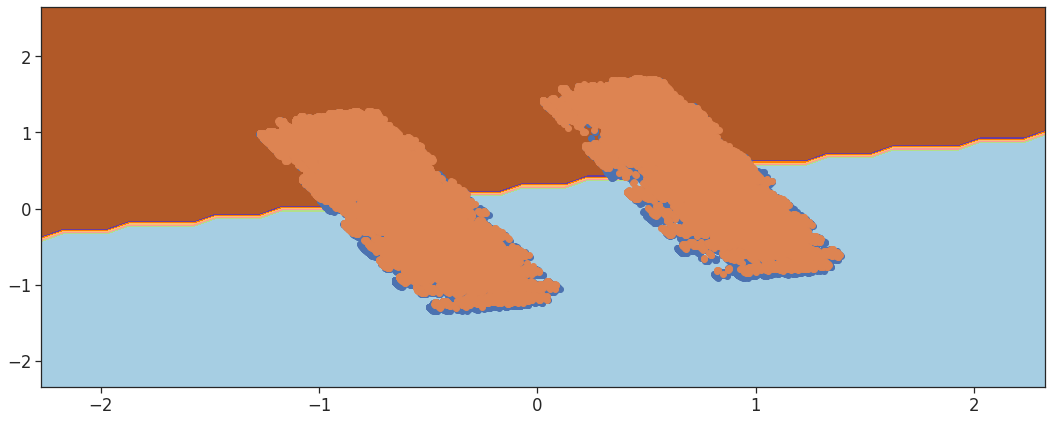

In [59]:
min1, max1 = X_pca[:, 0].min()-1, X_pca[:, 0].max()+1
min2, max2 = X_pca[:, 1].min()-1, X_pca[:, 1].max()+1
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
# make predictions for the grid
yhat = lr_de.predict(grid)
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

plt.figure(figsize=(18,7))
# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
  # get row indexes for samples with this class
  row_ix = np.where(df_train_one_hot.iloc[:,-1] == class_value)
  # create scatter of these samples
  plt.scatter(X_pca[row_ix, 0], X_pca[row_ix, 1], cmap='Paired')
# show the plot
plt.show()

## – Random Forest

In [49]:
forest_de = RandomForestClassifier()
forest_de.fit(x_train2,y_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

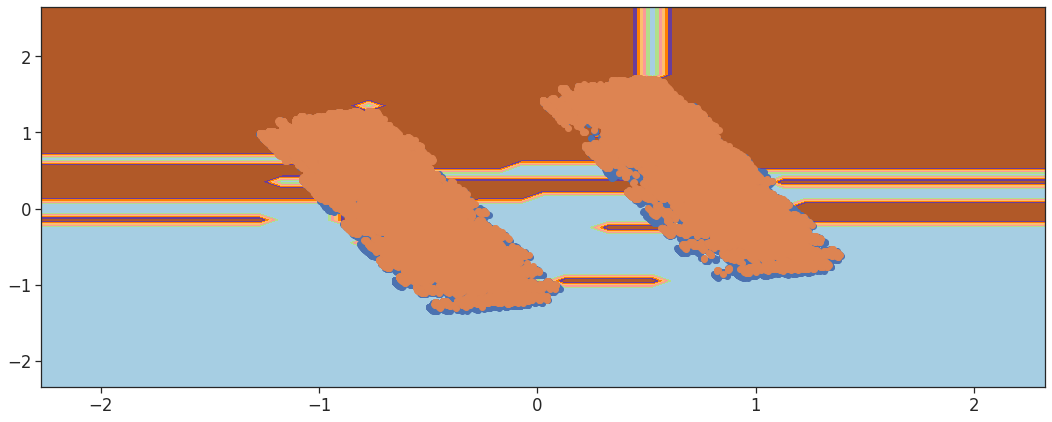

In [58]:
min1, max1 = X_pca[:, 0].min()-1, X_pca[:, 0].max()+1
min2, max2 = X_pca[:, 1].min()-1, X_pca[:, 1].max()+1
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
# make predictions for the grid
yhat = forest_de.predict(grid)
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

plt.figure(figsize=(18,7))
# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
  # get row indexes for samples with this class
  row_ix = np.where(df_train_one_hot.iloc[:,-1] == class_value)
  # create scatter of these samples
  plt.scatter(X_pca[row_ix, 0], X_pca[row_ix, 1], cmap='Paired')
# show the plot
plt.show()

## – Sequencial Model w/out Embbedings

In [54]:
_, in_dim_de = x_train2.shape


model_seq_de = Sequential()

model_seq_de.add(Dense(128, input_dim=in_dim_de)) 
model_seq_de.add(Dense(64, activation='relu'))
model_seq_de.add(Dense(16, activation='relu'))
model_seq_de.add(Dense(1, activation='sigmoid'))  

model_seq_de.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics='AUC')

In [55]:
model_seq_de.fit(x_train2, y_train2, validation_data=(x_test2, y_test2), epochs=10, batch_size=64)

Epoch 1/10
782/782 [==============================] - 1s 2ms/step - loss: 0.5320 - auc: 0.7887 - val_loss: 0.5355 - val_auc: 0.7846
Epoch 2/10
782/782 [==============================] - 1s 2ms/step - loss: 0.5264 - auc: 0.7922 - val_loss: 0.5343 - val_auc: 0.7859
Epoch 3/10
782/782 [==============================] - 1s 2ms/step - loss: 0.5242 - auc: 0.7945 - val_loss: 0.5330 - val_auc: 0.7872
Epoch 4/10
782/782 [==============================] - 1s 2ms/step - loss: 0.5226 - auc: 0.7967 - val_loss: 0.5306 - val_auc: 0.7917
Epoch 5/10
782/782 [==============================] - 1s 2ms/step - loss: 0.5218 - auc: 0.7984 - val_loss: 0.5347 - val_auc: 0.7886
Epoch 6/10
782/782 [==============================] - 1s 2ms/step - loss: 0.5210 - auc: 0.8002 - val_loss: 0.5285 - val_auc: 0.7972
Epoch 7/10
782/782 [==============================] - 1s 2ms/step - loss: 0.5189 - auc: 0.8032 - val_loss: 0.5260 - val_auc: 0.8014
Epoch 8/10
782/782 [==============================] - 1s 2ms/step - loss: 0.

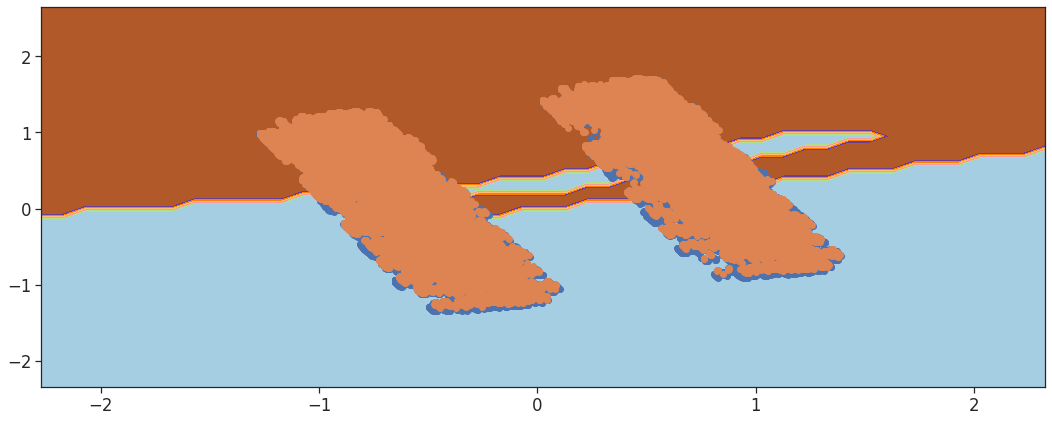

In [57]:
min1, max1 = X_pca[:, 0].min()-1, X_pca[:, 0].max()+1
min2, max2 = X_pca[:, 1].min()-1, X_pca[:, 1].max()+1
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
# make predictions for the grid
yhat = model_seq_de.predict_classes(grid)
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

plt.figure(figsize=(18,7))
# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
  # get row indexes for samples with this class
  row_ix = np.where(df_train_one_hot.iloc[:,-1] == class_value)
  # create scatter of these samples
  plt.scatter(X_pca[row_ix, 0], X_pca[row_ix, 1], cmap='Paired')
# show the plot
plt.show()

# Preguntas Adicionales

## 1 - Cómo podrían usar este clasificador que armaron para hacer un ranking de que productos recomendar a cada usuario ?

> Podemos usar las probabilidades que nos da el modelo de comprar cada item y haciendo el filtro despues por usuario tenemos los n items con mas probabilidad de ser adquiridos por el usuario.

## 2 - Podrían armar el ranking de productos a recomendar para cada user id?

>  Si, podriamos armar un cluster para ver que usuarios son similares y en base a las probabilidades que arroja el modelo y podemos recomendar los productos con mayor probabilidad entre usuarios similares.